In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D 

Text(0, 0.5, 'Price of the eggs')

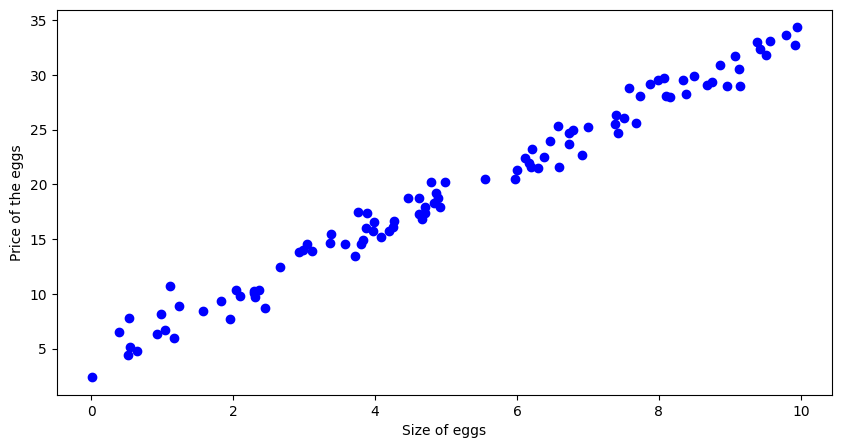

In [2]:
X = 10 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Data', color='blue')
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')

### Fit a basic line based on some assumption

For the given dataset, lets fit a linear curve:

\[
\begin{aligned}
y =  w * x + b
\end{aligned}
\]

where:
- w is the slope of the function (called as weight)
- b is the intercept (called as bias)

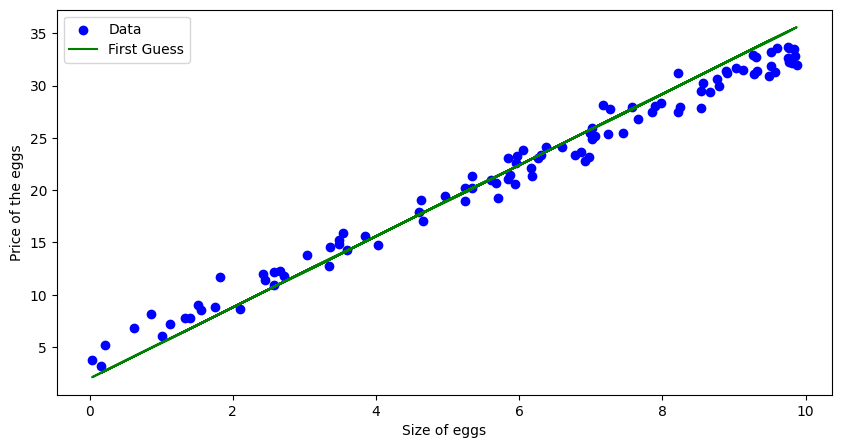

In [3]:
X = 10 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1)
f = lambda x: 3.4 * x + 2
z = f(X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, z, color='green', label='First Guess')
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

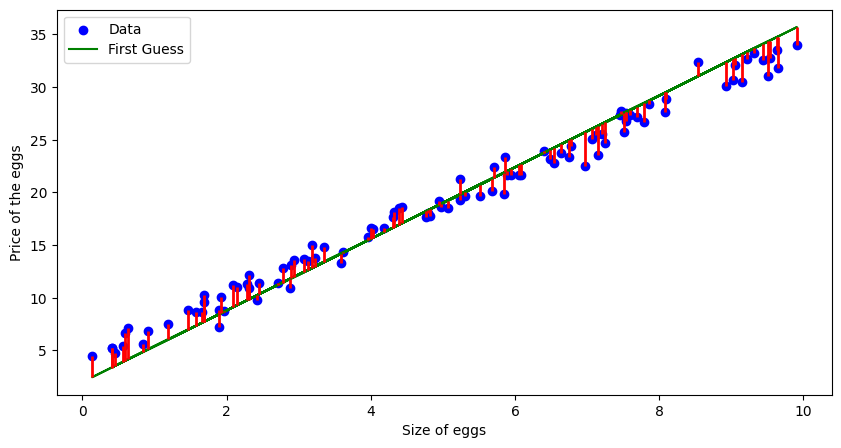

In [4]:
x = 10 * np.random.rand(100, 1)  
y = 4 + 3 * x + np.random.randn(100, 1)
f = lambda x: 3.4 * x + 2
z = f(x)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, color='green', label='First Guess')
for xi, yi, zi in zip(x, y, z):
    plt.vlines([xi], ymin=yi, ymax=zi, color='red', linestyle='-', linewidth=2)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

In [5]:
L1 = lambda z, y: np.sum(np.abs(y-z))
L2 = lambda z, y: np.sum((y-z)**2)
MAE = lambda z, y: np.sum(np.abs(y - z)) / len(y)
MSE = lambda z, y: np.sum((y - z)**2) / len(y)
Huber_L = lambda y, z, delta: np.where(np.abs(y - z) < delta, 0.5 * (y - z) ** 2, delta * (np.abs(y - z) - 0.5 * delta))

In [6]:
print("L1:", L1(z, y))
print("L2:", L2(z, y))
print("MAE:", MAE(z, y))
print("MSE:", MSE(z, y))

L1: 123.6079157647639
L2: 209.63349214766794
MAE: 1.236079157647639
MSE: 2.0963349214766795


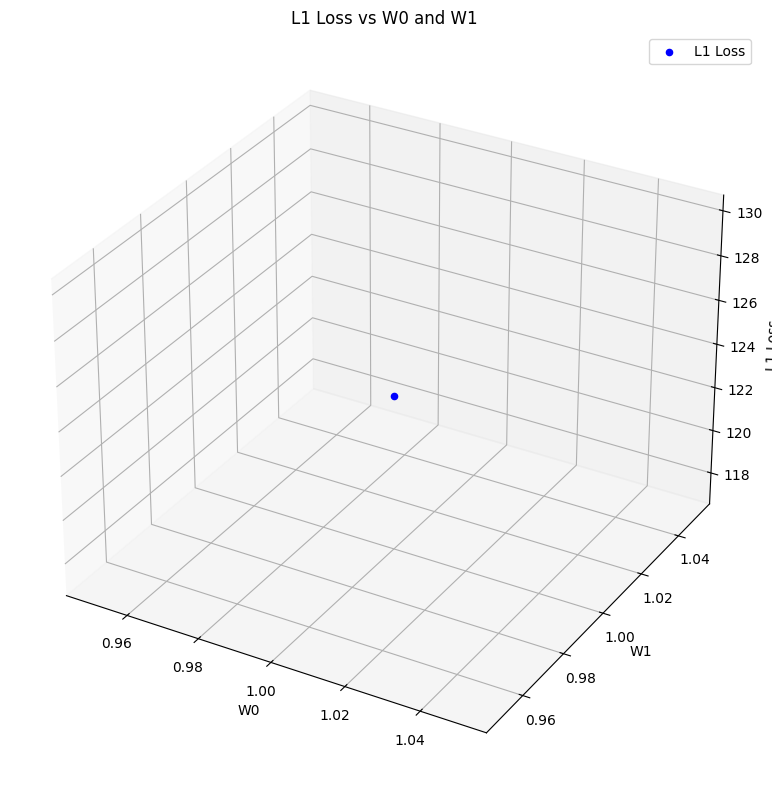

In [7]:
L1_list =[]
W0_list = []
W1_list = []

L1_list.append(L1(z, y))
W0_list.append(1)
W1_list.append(1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(W0_list, W1_list, L1_list, color='blue', label='L1 Loss')
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss vs W0 and W1')
ax.legend()
plt.tight_layout()
plt.show()


### Gradient Descent Update Rules

Given a simple linear regression model:

\[
\hat{y}_i = w_1 x_i + w_0
\]

The weights are updated using gradient descent as follows:

\[
\begin{aligned}
w_0 &\leftarrow w_0 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} \left( w_1 x_i + w_0 - y_i \right) \\
w_1 &\leftarrow w_1 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} x_i \cdot \left( w_1 x_i + w_0 - y_i \right)
\end{aligned}
\]

Where:
- \( \alpha \) is the learning rate  
- \( N \) is the number of samples  
- \( y_i \) is the true label  
- \( \hat{y}_i = w_1 x_i + w_0 \) is the predicted value


![alt text](tiduxiajiang-1.png "Title")

### Weight Update Function for Linear Regression

The function below performs one step of gradient descent to update the weights \( w_0 \) (bias) and \( w_1 \) (slope) for a simple linear regression model:

```python
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x) * np.sum([w1*x + w0 - y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x) * np.sum([2*x * (w1*x + w0 - y) for x, y in zip(x, y)]))
    return w0, w1



### Loss here is based on the mean squared error

Given a simple linear regression model:

\[
\begin{aligned}
mse =  \frac{1}{N} \sum_{i=1}^{N} \left( y_{pred} - y_{real} \right)^2
\end{aligned}
\]

In [8]:
w0=0
w1=0
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x)*np.sum([w1*x+w0-y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x)*np.sum([2*x*(w1*x+w0-y) for x, y in zip(x, y)]))
    return w0, w1


### Loss here is based on the absolute error (L1 loss)

Given a simple linear regression model:

\[
\begin{aligned}
L1 =   \sum_{i=1}^{N} \left( |y_{pred} - y_{real}| \right)
\end{aligned}
\]

The L1 loss function is defined as:


\begin{aligned}
L = \sum_{i=1}^n \left| y_i - (w_1 x_i + w_0) \right|
\end{aligned}


The subgradient of the absolute value function is:

\begin{aligned}
\frac{\partial}{\partial z} |z| = 
\begin{cases}
+1 & \text{if } z > 0 \\
-1 & \text{if } z < 0 \\
[-1, 1] & \text{if } z = 0
\end{cases}
\end{aligned}

where 
\begin{aligned} 
( z = y_i - (w_1 x_i + w_0) )
\end{aligned}.

Using this, the gradients for parameters \( w_0 \) and \( w_1 \) are:

\begin{aligned}
\frac{\partial L}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n \text{sign}\big( (w_1 x_i + w_0) - y_i \big)
\end{aligned}

\begin{aligned}
\frac{\partial L}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n x_i \cdot \text{sign}\big( (w_1 x_i + w_0) - y_i \big)
\end{aligned}

Then, the gradient descent update rules become:

\begin{aligned}
w_0 \leftarrow w_0 - \eta \frac{\partial L}{\partial w_0}
\end{aligned}

\begin{aligned}
w_1 \leftarrow w_1 - \eta \frac{\partial L}{\partial w_1}
\end{aligned}

where \(\eta\) is the learning rate.


In [9]:
def update_weights_l1(w0, w1, learning_rate=0.01):
    preds = w1 * x + w0
    errors = preds - y
    signs = np.sign(errors)
    grad_w0 = np.sum(signs) 
    grad_w1 = np.sum(signs * x) 
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

    return w0, w1


 98%|█████████▊| 98/100 [00:00<00:00, 2420.06it/s]

Epoch 1, w0: 0.1000, w1: 0.4946, L1 Loss: 1630.6834
Epoch 2, w0: 0.2000, w1: 0.9891, L1 Loss: 1376.1010
Epoch 3, w0: 0.3000, w1: 1.4837, L1 Loss: 1121.5186
Epoch 4, w0: 0.4000, w1: 1.9782, L1 Loss: 866.9362
Epoch 5, w0: 0.5000, w1: 2.4728, L1 Loss: 612.3538
Epoch 6, w0: 0.6000, w1: 2.9673, L1 Loss: 357.7714
Epoch 7, w0: 0.7000, w1: 3.4619, L1 Loss: 152.2745
Epoch 8, w0: 0.7460, w1: 3.5496, L1 Loss: 155.0333
Epoch 9, w0: 0.7600, w1: 3.4258, L1 Loss: 153.7776
Epoch 10, w0: 0.8200, w1: 3.6079, L1 Loss: 165.6395
Epoch 11, w0: 0.8160, w1: 3.3750, L1 Loss: 160.4492
Epoch 12, w0: 0.8800, w1: 3.5876, L1 Loss: 161.2652
Epoch 13, w0: 0.8780, w1: 3.3675, L1 Loss: 158.0647
Epoch 14, w0: 0.9420, w1: 3.5802, L1 Loss: 159.7503
Epoch 15, w0: 0.9400, w1: 3.3601, L1 Loss: 155.6802
Epoch 16, w0: 1.0040, w1: 3.5727, L1 Loss: 158.2354
Epoch 17, w0: 1.0020, w1: 3.3526, L1 Loss: 153.2957
Epoch 18, w0: 1.0660, w1: 3.5653, L1 Loss: 156.7204
Epoch 19, w0: 1.0640, w1: 3.3452, L1 Loss: 150.9112
Epoch 20, w0: 1.12

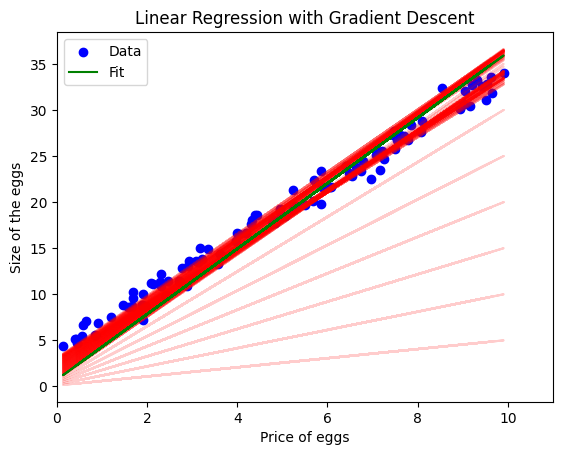

In [11]:
w0=0
w1=0
epoch = 100
mse = []
iterations = np.arange(epoch)
L1_list =[]
W0_list = []
W1_list = []
n = 0 
lr = 0.001
from tqdm import tqdm
for i in tqdm(range(epoch)):
    w0, w1 = update_weights_l1(w0, w1, learning_rate=lr)
    W0_list.append(w0)
    W1_list.append(w1)
    plt.plot(x, [w0 + w1 * xi for xi in x], color='red', alpha=0.2)
    a = w0 + w1 * np.array(x)
    b = np.array(y)
    L1loss = np.sum(np.abs(b - a))
    L1_list.append(L1loss)
    ##Stopping Condition
    if n == 0:
        f_w0 = w0
        f_w1 = w1
    if i == 0:
        L1loss_prev = L1loss
    else:
        if L1loss_prev > L1loss:
            L1loss_prev = L1loss
        else:
            L1loss_prev = L1loss
            n += 1
    if n > 50:
        print("Stopping early after 3 iterations with no decrease in loss")
        break
    print(f'Epoch {i+1}, w0: {w0:.4f}, w1: {w1:.4f}, L1 Loss: {L1loss:.4f}')

z = f_w0 + f_w1 * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit', color='green')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Price of eggs')
plt.ylabel('Size of the eggs')
plt.legend()

/var/folders/8p/dgslxnm15hn4k2p1pv_qsp500000gn/T/ipykernel_4746/3579537420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(W0, W1, L1, cmap='viridis', label='L1 movement')


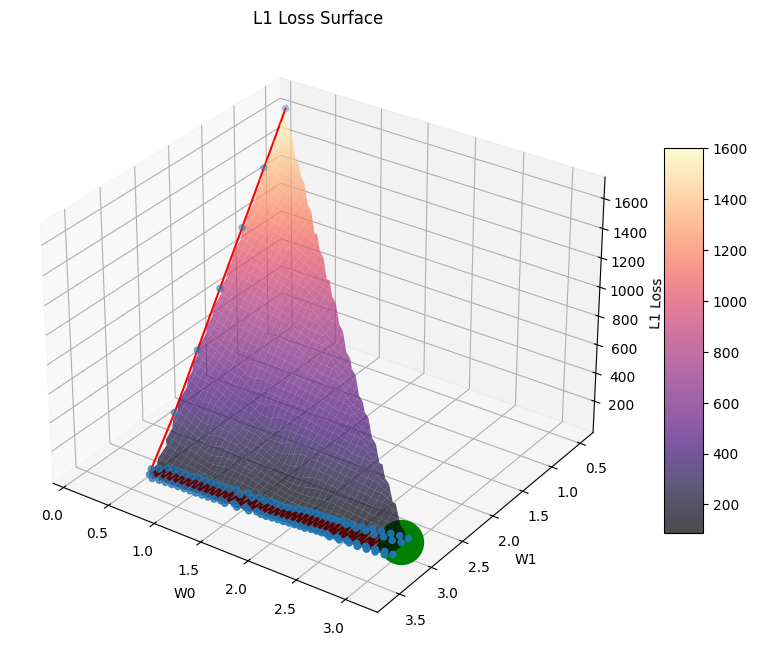

In [14]:
from scipy.interpolate import griddata
W0 = np.array(W0_list)
W1 = np.array(W1_list)
L1 = np.array(L1_list)
min_idx = np.argmin(L1)
min_w0 = W0[min_idx]
min_w1 = W1[min_idx]
min_l1 = L1[min_idx]

# Create a grid over the domain
grid_w0, grid_w1 = np.meshgrid(
    np.linspace(W0.min(), W0.max(), 100),
    np.linspace(W1.min(), W1.max(), 100)
)

# Interpolate L1 values on the grid
grid_l1 = griddata((W0, W1), L1, (grid_w0, grid_w1), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_w0, grid_w1, grid_l1, cmap='magma', edgecolor='none', alpha=0.7)
ax.scatter(W0, W1, L1, cmap='viridis', label='L1 movement')
ax.plot(W0, W1, L1, color='red', label='L1 movement')
ax.scatter(min_w0, min_w1, min_l1, color='green', s=1000, label='Min L1')
ax.view_init(210, 235)
ax.invert_zaxis()
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

 22%|██▏       | 223/1000 [00:00<00:00, 1193.93it/s]

Epoch 1, w0: 0.3771, w1: 4.5668, MSE Loss: 36.5157
Epoch 2, w0: 0.2949, w1: 3.2920, MSE Loss: 6.7046
Epoch 3, w0: 0.3404, w1: 3.6434, MSE Loss: 4.2852
Epoch 4, w0: 0.3503, w1: 3.5421, MSE Loss: 4.0916
Epoch 5, w0: 0.3700, w1: 3.5669, MSE Loss: 4.0422
Epoch 6, w0: 0.3868, w1: 3.5565, MSE Loss: 4.0122
Epoch 7, w0: 0.4044, w1: 3.5560, MSE Loss: 3.9817
Epoch 8, w0: 0.4216, w1: 3.5527, MSE Loss: 3.9521
Epoch 9, w0: 0.4388, w1: 3.5503, MSE Loss: 3.9227
Epoch 10, w0: 0.4559, w1: 3.5476, MSE Loss: 3.8935
Epoch 11, w0: 0.4730, w1: 3.5450, MSE Loss: 3.8646
Epoch 12, w0: 0.4899, w1: 3.5423, MSE Loss: 3.8360
Epoch 13, w0: 0.5068, w1: 3.5397, MSE Loss: 3.8077
Epoch 14, w0: 0.5236, w1: 3.5372, MSE Loss: 3.7796
Epoch 15, w0: 0.5403, w1: 3.5346, MSE Loss: 3.7518
Epoch 16, w0: 0.5570, w1: 3.5320, MSE Loss: 3.7243
Epoch 17, w0: 0.5735, w1: 3.5295, MSE Loss: 3.6971
Epoch 18, w0: 0.5900, w1: 3.5269, MSE Loss: 3.6700
Epoch 19, w0: 0.6064, w1: 3.5244, MSE Loss: 3.6433
Epoch 20, w0: 0.6227, w1: 3.5219, MSE L

 63%|██████▎   | 629/1000 [00:00<00:00, 1354.29it/s]

Epoch 322, w0: 3.2275, w1: 3.1206, MSE Loss: 1.0090
Epoch 323, w0: 3.2314, w1: 3.1200, MSE Loss: 1.0075
Epoch 324, w0: 3.2352, w1: 3.1194, MSE Loss: 1.0061
Epoch 325, w0: 3.2390, w1: 3.1188, MSE Loss: 1.0046
Epoch 326, w0: 3.2428, w1: 3.1182, MSE Loss: 1.0032
Epoch 327, w0: 3.2466, w1: 3.1177, MSE Loss: 1.0018
Epoch 328, w0: 3.2503, w1: 3.1171, MSE Loss: 1.0004
Epoch 329, w0: 3.2541, w1: 3.1165, MSE Loss: 0.9990
Epoch 330, w0: 3.2578, w1: 3.1159, MSE Loss: 0.9976
Epoch 331, w0: 3.2615, w1: 3.1154, MSE Loss: 0.9963
Epoch 332, w0: 3.2652, w1: 3.1148, MSE Loss: 0.9949
Epoch 333, w0: 3.2688, w1: 3.1142, MSE Loss: 0.9936
Epoch 334, w0: 3.2725, w1: 3.1137, MSE Loss: 0.9922
Epoch 335, w0: 3.2761, w1: 3.1131, MSE Loss: 0.9909
Epoch 336, w0: 3.2797, w1: 3.1125, MSE Loss: 0.9896
Epoch 337, w0: 3.2833, w1: 3.1120, MSE Loss: 0.9884
Epoch 338, w0: 3.2869, w1: 3.1114, MSE Loss: 0.9871
Epoch 339, w0: 3.2904, w1: 3.1109, MSE Loss: 0.9858
Epoch 340, w0: 3.2940, w1: 3.1103, MSE Loss: 0.9846
Epoch 341, w

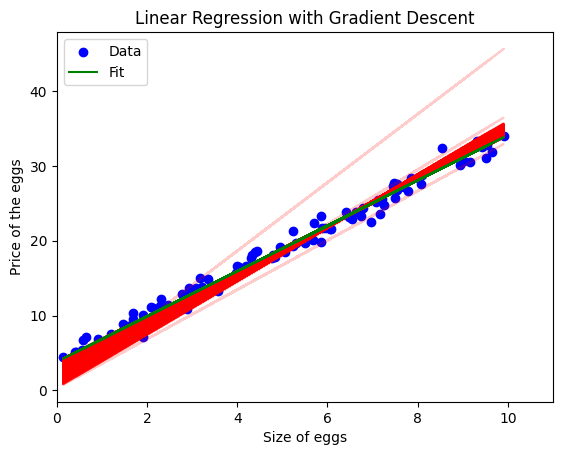

In [16]:
w0=0
w1=0
epoch = 1000
mse = []
iterations = np.arange(epoch)
W0_list = []
W1_list = []
n = 0
lr = 0.01
from tqdm import tqdm
for i in tqdm(range(epoch)):
    w0, w1 = update_weights(w0, w1, learning_rate=lr)
    W0_list.append(w0)
    W1_list.append(w1)
    plt.plot(x, [w0 + w1 * xi for xi in x], color='red', alpha=0.2)
    a = w0 + w1 * np.array(x)
    b = np.array(y)
    mean_squared_error = np.mean((a - b) ** 2)
    mse.append(mean_squared_error)
    ##Stopping Condition
    if n == 0:
        f_w0_1 = w0
        f_w1_1 = w1
    if i == 0:
        mse_prev = mean_squared_error
    else:
        if np.round(mse_prev, 4) > np.round(mean_squared_error, 4):
        # if mse_prev > mean_squared_error:
            # print(f"Mean Squared Error decreased from {mse_prev:.4f} to {mean_squared_error:.4f}")
            mse_prev = mean_squared_error
        elif np.round(mse_prev, 4) < np.round(mean_squared_error, 4):
            mse_prev = mean_squared_error
            n += 1
        elif np.round(mse_prev,4) == np.round(mean_squared_error,4):
            mse_prev = mean_squared_error
            n += 1
    if n > 2:
        print("Stopping early after 3 iterations with no decrease in loss")
        break
    print(f'Epoch {i+1}, w0: {w0:.4f}, w1: {w1:.4f}, MSE Loss: {mean_squared_error:.4f}')

z = f_w0_1 + f_w1_1 * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit', color='green')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

/var/folders/8p/dgslxnm15hn4k2p1pv_qsp500000gn/T/ipykernel_4746/2127880777.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(W0, W1, MSE_L, cmap='viridis', label='L1 movement', s=50)


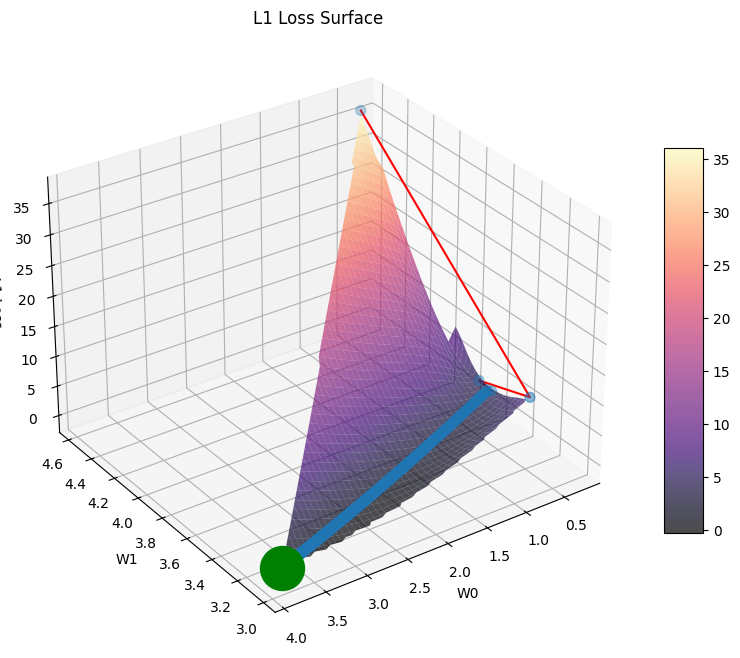

In [22]:
from scipy.interpolate import griddata
W0 = np.array(W0_list)
W1 = np.array(W1_list)
MSE_L = np.array(mse)
min_idx = np.argmin(MSE_L)
min_w0 = W0[min_idx]
min_w1 = W1[min_idx]
min_l1 = MSE_L[min_idx]

# Create a grid over the domain
grid_w0, grid_w1 = np.meshgrid(
    np.linspace(W0.min(), W0.max(), 100),
    np.linspace(W1.min(), W1.max(), 100)
)

# Interpolate L1 values on the grid
grid_l1 = griddata((W0, W1), MSE_L, (grid_w0, grid_w1), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_w0, grid_w1, grid_l1, cmap='magma', edgecolor='none', alpha=0.7)
ax.scatter(W0, W1, MSE_L, cmap='viridis', label='L1 movement', s=50)
ax.plot(W0, W1, MSE_L, color='red', label='L1 movement')
ax.scatter(min_w0, min_w1, min_l1, color='green', s=1000, label='Min L1')
ax.view_init(210, 125)
ax.invert_zaxis()
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

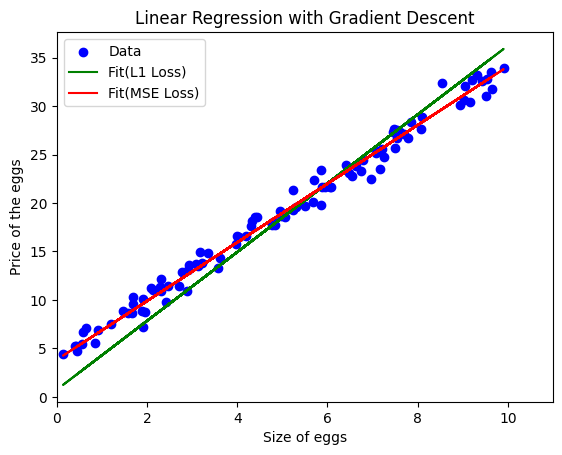

In [23]:
z = f_w0 + f_w1 * x
z_1 = f_w0_1 + f_w1_1 * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit(L1 Loss)', color='green')
plt.plot(x, z_1, label='Fit(MSE Loss)', color='red')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape((-1, 1)), y)



LinearRegression()

In [25]:
X = np.array(x).reshape((-1, 1))
model = LinearRegression().fit(X, y)

In [26]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.987647471318965


In [27]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [4.03469391]
slope: [[2.9962355]]


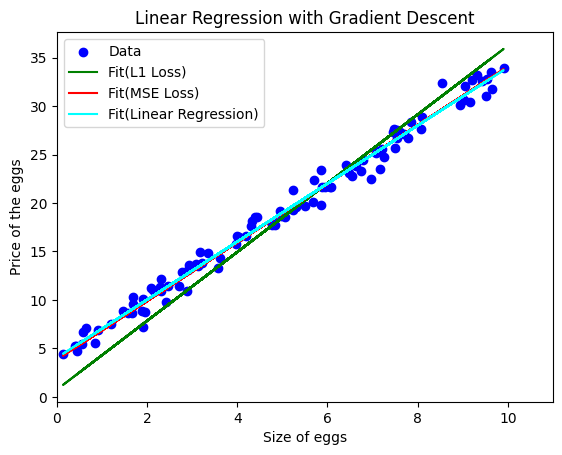

In [28]:
z = f_w0 + f_w1 * x
z_1 = f_w0_1 + f_w1_1 * x
z_n = model.intercept_ + model.coef_ * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit(L1 Loss)', color='green')
plt.plot(x, z_1, label='Fit(MSE Loss)', color='red')
plt.plot(x, z_n, label='Fit(Linear Regression)', color='cyan')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

# What if my chickens laid these
![alt text](golden-eggs-willy-wonka-and-the-chocolate-factory.gif "What if")

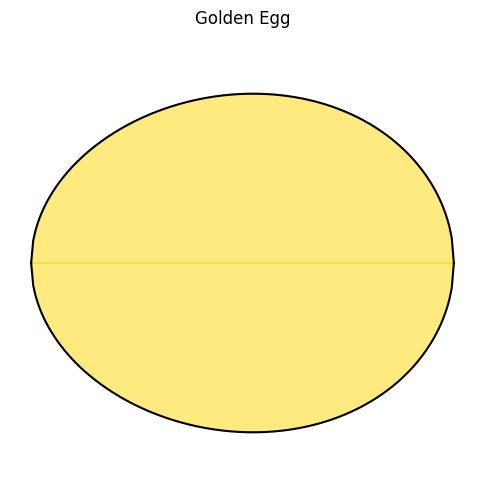

In [29]:
def plot_egg_shape(ax, L, B, w, D, title="Egg Shape"):
    x = np.linspace(-L/2, L/2, 200)
    y = B/2 * np.sqrt(1 - (2*x/L)**2) * (1 + w * (x/L))

    ax.plot(x, y, 'k')
    ax.plot(x, -y, 'k')
    ax.fill(x, y, color='gold', alpha=0.5)
    ax.fill(x, -y, color='gold', alpha=0.5)
    ax.axis('equal')
    ax.axis('off')
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(6, 6))

L_hen = 1.0 
B_hen = 0.8
w_hen = 0.1 
D_hen = 0.6

plot_egg_shape(ax, L_hen, B_hen, w_hen, D_hen, title="Golden Egg")
plt.show()


In [30]:
x_new = np.linspace(9, 12, 4).reshape((-1, 1))
y_pred = model.predict(x_new)
print(f"predicted response:\n{y_pred}")

predicted response:
[[31.00081346]
 [33.99704896]
 [36.99328447]
 [39.98951997]]


In [64]:
def sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=10):
    m = len(X)  
    theta = np.random.randn(2, 1) 
    
    X_bias = np.c_[np.ones((m, 1)), X]

    loss_history = []  
    n = 0
    for epoch in tqdm(range(epochs)):
        indices = np.random.permutation(m)
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradients

        predictions = X_bias.dot(theta)
        loss = np.mean((predictions - y) ** 2)
        loss_history.append(loss)
        
        if epoch == 0:
            loss_prev = loss
        else:
            if np.round(loss_prev, 4) > np.round(loss, 4):
            # if mse_prev > mean_squared_error:
                # print(f"Mean Squared Error decreased from {mse_prev:.4f} to {mean_squared_error:.4f}")
                loss_prev = loss
            elif np.round(mse_prev, 4) < np.round(loss, 4):
                loss_prev = loss
                n += 1
            elif np.round(mse_prev,4) == np.round(loss,4):
                loss_prev = loss
                n += 1
        if n > 2:
            print("Stopping early after 3 iterations with no decrease in loss")
            break
        print(f'Epoch {epoch+1}, w0: {w0:.4f}, w1: {w1:.4f}, MSE Loss: {loss:.4f}')

    return theta, loss_history

  2%|▏         | 21/1000 [00:00<00:00, 1655.09it/s]


Epoch 1, w0: 3.8491, w1: 3.0248, MSE Loss: 1.9183
Epoch 2, w0: 3.8491, w1: 3.0248, MSE Loss: 1.8257
Epoch 3, w0: 3.8491, w1: 3.0248, MSE Loss: 1.7713
Epoch 4, w0: 3.8491, w1: 3.0248, MSE Loss: 1.6368
Epoch 5, w0: 3.8491, w1: 3.0248, MSE Loss: 1.5948
Epoch 6, w0: 3.8491, w1: 3.0248, MSE Loss: 1.5430
Epoch 7, w0: 3.8491, w1: 3.0248, MSE Loss: 1.4481
Epoch 8, w0: 3.8491, w1: 3.0248, MSE Loss: 1.4009
Epoch 9, w0: 3.8491, w1: 3.0248, MSE Loss: 1.3523
Epoch 10, w0: 3.8491, w1: 3.0248, MSE Loss: 1.3224
Epoch 11, w0: 3.8491, w1: 3.0248, MSE Loss: 1.2669
Epoch 12, w0: 3.8491, w1: 3.0248, MSE Loss: 1.2249
Epoch 13, w0: 3.8491, w1: 3.0248, MSE Loss: 1.1954
Epoch 14, w0: 3.8491, w1: 3.0248, MSE Loss: 1.2218
Epoch 15, w0: 3.8491, w1: 3.0248, MSE Loss: 1.1438
Epoch 16, w0: 3.8491, w1: 3.0248, MSE Loss: 1.2144
Epoch 17, w0: 3.8491, w1: 3.0248, MSE Loss: 1.0866
Epoch 18, w0: 3.8491, w1: 3.0248, MSE Loss: 1.0687
Epoch 19, w0: 3.8491, w1: 3.0248, MSE Loss: 1.0487
Epoch 20, w0: 3.8491, w1: 3.0248, MSE Lo

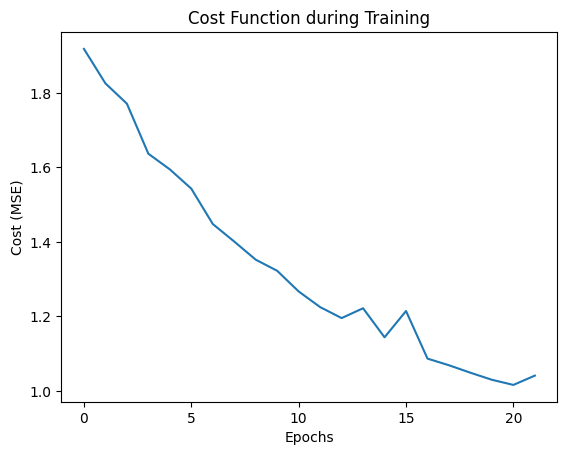

In [65]:
theta_final, cost_history = sgd(X, y, learning_rate=0.001, epochs=1000, batch_size=1)
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function during Training')
plt.show()

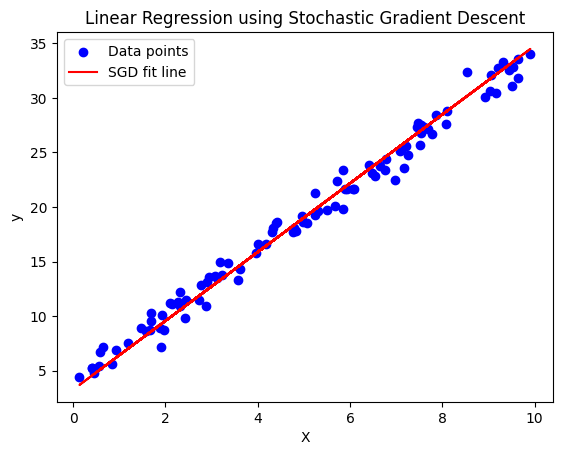

In [66]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, np.c_[np.ones((X.shape[0], 1)), X].dot(theta_final), color='red', label='SGD fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Stochastic Gradient Descent')
plt.legend()
plt.show()

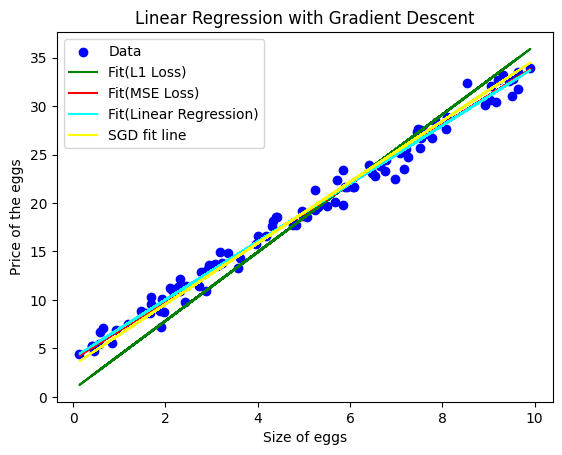

In [67]:
z = f_w0 + f_w1 * x
z_1 = f_w0_1 + f_w1_1 * x
z_n = model.intercept_ + model.coef_ * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit(L1 Loss)', color='green')
plt.plot(x, z_1, label='Fit(MSE Loss)', color='red')
plt.plot(x, z_n, label='Fit(Linear Regression)', color='cyan')
plt.plot(X, np.c_[np.ones((X.shape[0], 1)), X].dot(theta_final), color='yellow', label='SGD fit line')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()